In [1]:
import gym
import random
import numpy as np

In [2]:
env_name = "CartPole-v0"
env = gym.make(env_name)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action space: Discrete(2)


In [3]:
class HillClimbingAgent():
    def __init__(self, env):
        self.state_dim = env.observation_space.shape
        self.action_size = env.action_space.n
        self.build_model()
        
    def build_model(self):
        self.weights = 1e-4*np.random.rand(*self.state_dim, self.action_size)
        self.best_reward = -np.Inf
        self.best_weights = np.copy(self.weights)
        self.noise_scale = 1e-2
        
    def get_action(self, state):
        p = np.dot(state, self.weights)
        action = np.argmax(p)
        return action
    
    def update_model(self, reward):
        if reward >= self.best_reward:
            self.best_reward = reward
            self.best_weights = np.copy(self.weights)
            self.noise_scale = max(self.noise_scale/2, 1e-3)
        else:
            self.noise_scale = min(self.noise_scale*2, 2)
            
        self.weights = self.best_weights + self.noise_scale * np.random.rand(*self.state_dim, self.action_size)

In [ ]:
agent = HillClimbingAgent(env)
num_episodes = 50
timelist=[]
anglelist=[]
vel=[]
time=0

for ep in range(num_episodes):
    state = env.reset()
    #time=0
    #temp_time=[]
    #temp_angle=[]
    #temp_vel=[]
    total_reward = 0
    done = False
    while not done:
        action = agent.get_action(state)
        state, reward, done, info = env.step(action)
        env.render()
        total_reward += reward
        time=time+1
        timelist.append(time)
        #temp_angle.append(state[2])
        anglelist.append(state[2])
        #temp_vel.append(state[3])
        vel.append(state[3])
    #timelist.append(temp_time)
    #anglelist.append(temp_angle)
    #vel.append(temp_vel)   
    agent.update_model(total_reward)
    print("Tournament: {}, total_reward: {:.2f}".format(ep, total_reward))

No handles with labels found to put in legend.


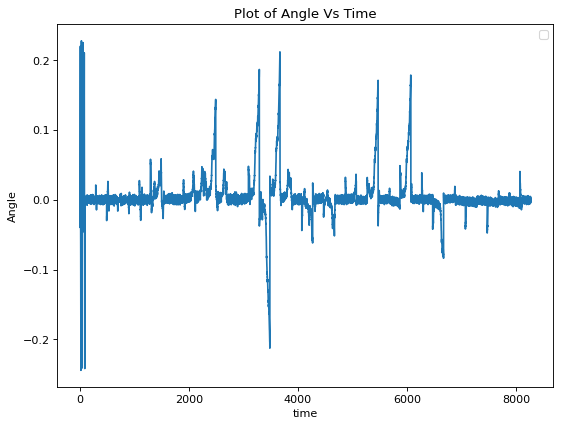

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(timelist,anglelist)
#plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Plot of Angle Vs Time')
plt.xlabel('time')
plt.ylabel('Angle')
plt.show()

No handles with labels found to put in legend.


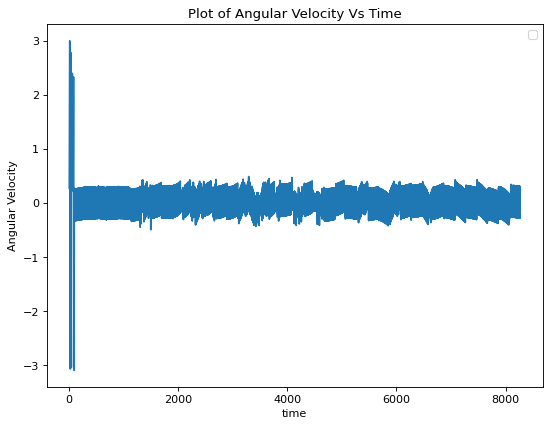

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(timelist,vel)
#plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Plot of Angular Velocity Vs Time')
plt.xlabel('time')
plt.ylabel('Angular Velocity')
plt.show()